This notebook will detail some functions that will be useful towards completing your final projects!

Many of you are looking at data for specific sites, meaning line plots/histograms will be the most useful rather than mapping and plotting figures.

First, let's look at ways to load in data files, we will start by looking at a METAR station file for Massachusetts from the winter months of 2006-2007.

In [2]:
#Loading in the text file through pandas
import pandas as pd

df = pd.read_csv("/home/mariofire/Downloads/MA.txt")
df

,USAF WBAN YR--MODAHRMN DIR SPD GUS CLG SKC L M H VSB MW MW MW MW AW AW AW AW W TEMP DEWP SLP ALT STP MAX MIN PCP01 PCP06 PCP24 PCPXX SD
0,722256 64774 200711010000 170 10 *** 722 CLR ...
1,722256 64774 200711010020 170 8 *** 722 CLR ...
2,722256 64774 200711010040 990 6 16 722 CLR ...
3,722256 64774 200711010100 160 9 *** 722 CLR ...
4,722256 64774 200711010120 170 9 16 722 CLR ...
...,...
377005,998014 99999 200811011900 *** *** *** *** *** ...
377006,998014 99999 200811012000 *** *** *** *** *** ...
377007,998014 99999 200811012100 *** *** *** *** *** ...
377008,998014 99999 200811012200 *** *** *** *** *** ...


When we open the above file in pandas, we notice that we import all the rows, however, we only import one column!

This is because the pandas function read_csv assumes that our data is separated by commas, so when it isn't, it puts it all into one column! 

We can change this by telling it what separates the data, in our case above, its a space. MAKE SURE: When you are loading in your data, check to see what is sepearating the data by opening the dataset in a text editor and checking it out!

In [3]:
#Import the data file with pandas and a separator NOTE: This will ERROR out, go to next cell for the fix!
data_file = "/home/mariofire/Downloads/MA.txt"
data_file_delimiter = " "
df = pd.read_csv(data_file,sep=" ")

ParserError: Error tokenizing data. C error: Expected 45 fields in line 7499, saw 46


We see a ParserError when we try and run this. This is because the way the data is put in the files, some delimiters are missing, therefore we end up with more columns of data than we actually have in some cases!

To fix this, we need to filter each line, since when we split them, some values return none. By removing these none values, we can get an equal amount of columns for each. 

In [5]:
#Open the data file and read all lines into a list
with open(data_file) as f:
    lines = f.readlines()
#Parse the list and filter out the none values for each row.
df = pd.DataFrame([list(filter(None,line.rstrip('\n').split(' '))) for line in lines])

df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,...,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
1,722256,64774,200711010000,170,10,***,722,CLR,*,*,...,******,30.22,******,***,***,*****,*****,*****,*****,**
2,722256,64774,200711010020,170,8,***,722,CLR,*,*,...,******,30.22,******,***,***,*****,*****,*****,*****,**
3,722256,64774,200711010040,990,6,16,722,CLR,*,*,...,******,30.21,1022.7,***,***,*****,*****,*****,*****,**
4,722256,64774,200711010100,160,9,***,722,CLR,*,*,...,******,30.21,******,***,***,*****,*****,*****,*****,**
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377006,998014,99999,200811011900,***,***,***,***,***,*,*,...,******,*****,******,***,***,*****,*****,*****,*****,**
377007,998014,99999,200811012000,***,***,***,***,***,*,*,...,******,*****,******,***,***,*****,*****,*****,*****,**
377008,998014,99999,200811012100,***,***,***,***,***,*,*,...,******,*****,******,***,***,*****,*****,*****,*****,**
377009,998014,99999,200811012200,***,***,***,***,***,*,*,...,******,*****,******,***,***,*****,*****,*****,*****,**


In [6]:
#The first row contains the column names, so let's set them in the DataFrame!
#We use the iloc function to grab the row we need
df.columns = df.iloc[0].values

#Remove the first row from the DataFrame since we maee it the column names
df = df.drop(df.index[0])
df

,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,...,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
1,722256,64774,200711010000,170,10,***,722,CLR,*,*,...,******,30.22,******,***,***,*****,*****,*****,*****,**
2,722256,64774,200711010020,170,8,***,722,CLR,*,*,...,******,30.22,******,***,***,*****,*****,*****,*****,**
3,722256,64774,200711010040,990,6,16,722,CLR,*,*,...,******,30.21,1022.7,***,***,*****,*****,*****,*****,**
4,722256,64774,200711010100,160,9,***,722,CLR,*,*,...,******,30.21,******,***,***,*****,*****,*****,*****,**
5,722256,64774,200711010120,170,9,16,722,CLR,*,*,...,******,30.20,******,***,***,*****,*****,*****,*****,**
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377006,998014,99999,200811011900,***,***,***,***,***,*,*,...,******,*****,******,***,***,*****,*****,*****,*****,**
377007,998014,99999,200811012000,***,***,***,***,***,*,*,...,******,*****,******,***,***,*****,*****,*****,*****,**
377008,998014,99999,200811012100,***,***,***,***,***,*,*,...,******,*****,******,***,***,*****,*****,*****,*****,**
377009,998014,99999,200811012200,***,***,***,***,***,*,*,...,******,*****,******,***,***,*****,*****,*****,*****,**


And that is how we can load in a METAR file. Now we have the column headers and the appropriate data put into each column. Now manipulating the data is easy, we just pick the column or columns we want from the DataFrame!

For example, let's plot the temp for the first station.

In [7]:
#First, we group the values by station
df.groupby(['USAF']).groups

{'722256': Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
                10,
             ...
             25441, 25442, 25443, 25444, 25445, 25446, 25447, 25448, 25449,
             25450],
            dtype='int64', length=25450),
 '725059': Int64Index([25451, 25452, 25453, 25454, 25455, 25456, 25457, 25458, 25459,
             25460,
             ...
             38262, 38263, 38264, 38265, 38266, 38267, 38268, 38269, 38270,
             38271],
            dtype='int64', length=12821),
 '725060': Int64Index([38272, 38273, 38274, 38275, 38276, 38277, 38278, 38279, 38280,
             38281,
             ...
             49658, 49659, 49660, 49661, 49662, 49663, 49664, 49665, 49666,
             49667],
            dtype='int64', length=11396),
 '725063': Int64Index([49668, 49669, 49670, 49671, 49672, 49673, 49674, 49675, 49676,
             49677,
             ...
             62877, 62878, 62879, 62880, 62881, 62882, 62883, 62884, 62885,
             62

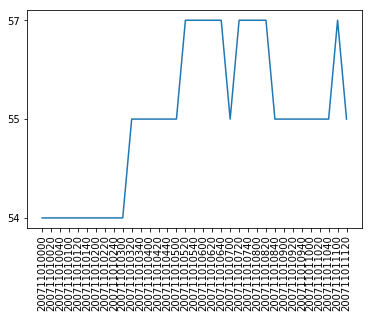

In [18]:
#Now we will take the first station and plot its wind speed data for each time step
station = df.groupby("USAF").get_group("722256").TEMP
#Remove the missing values, IN THIS CASE they are marked by *** and ****, CHECK YOUR FILE TO FIND OUT WHAT IT IS USING
station2 = station[station!="***"]
station2 = station2[station2!="****"]
#Do the same for the dates
dates = df.groupby("USAF").get_group("722256")["YR--MODAHRMN"]
dates = dates[station!="***"]
dates = dates[station!="****"]
#Plot the Data
from matplotlib import pyplot as plt
#Plot the data with the dates on the x axis and the temps on the y axis. We will only plot 35 of the points to save time
plt.plot(dates[0:35],station2[0:35])
#Rotate 
plt.xticks(rotation=90)
plt.show()

This is one way to plot data, when we are using a text file. It's easy to work with after we manipulate the data into the form we need. This is the issue with data that is saved in a non-specific format in files (not separated by commas, not separated by a single space, having more columns for some dates than others, etc).  

Let's say we have our data in a csv or excel file, let's look at how that process goes for loading in and plotting the data. We will use the klwm_2019.csv file to perform this action. To obtain this file go to this website: 
https://mesonet.agron.iastate.edu/request/download.phtml

Select Network Massachusetts ASOS and click the switch network button

Under it, in the available stations find Lawrence, MA and click on it so it is highlighted blue and click the add selected button. You should see it appear to the right under selected stations. 

Leave the available data set to all and for dates select from Jan 1, 2019 to Sep 1, 2019.

Now scroll down to the bottom and click, get the data!

The data will appear in the browser. Highlight it all and right click save-as and name the file klwm_2019.csv.

This will save our file as a csv (comma-separated value) file which we can import right into a DataFrame!

In [21]:
#Import the file (MAKE SURE to change the PATH to where the file is located on your computer!)
df = pd.read_csv('/media/mariofire/4TBExternal/klwm_2019.csv')
df

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
0,LWM,2019-01-01 00:00,M,M,M,170.00,6.00,M,30.25,M,...,M,M,M,M,M,M,M,M,M,KLWM 010000Z AUTO 17006KT 10SM OVC060 06/M02 A...
1,LWM,2019-01-01 00:05,M,M,M,160.00,5.00,M,30.25,M,...,M,M,M,M,M,M,M,M,M,KLWM 010005Z AUTO 16005KT 10SM OVC060 06/M02 A...
2,LWM,2019-01-01 00:10,M,M,M,160.00,4.00,M,30.25,M,...,M,M,M,M,M,M,M,M,M,KLWM 010010Z AUTO 16004KT 10SM OVC060 06/M02 A...
3,LWM,2019-01-01 00:15,M,M,M,160.00,6.00,M,30.24,M,...,M,M,M,M,M,M,M,M,M,KLWM 010015Z AUTO 16006KT 10SM OVC055 06/M02 A...
4,LWM,2019-01-01 00:20,M,M,M,170.00,4.00,M,30.24,M,...,M,-RA,M,M,M,M,M,M,M,KLWM 010020Z AUTO 17004KT 10SM -RA OVC050 06/M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72632,LWM,2019-08-31 23:35,M,M,M,340.00,2.00,M,30.25,M,...,M,M,M,M,M,M,M,M,M,KLWM 312335Z AUTO 34002KT 10SM CLR 21/11 A3025...
72633,LWM,2019-08-31 23:40,M,M,M,350.00,4.00,M,30.25,M,...,M,M,M,M,M,M,M,M,M,KLWM 312340Z AUTO 35004KT 10SM CLR 20/11 A3025...
72634,LWM,2019-08-31 23:45,M,M,M,360.00,4.00,M,30.26,M,...,M,M,M,M,M,M,M,M,M,KLWM 312345Z AUTO 36004KT 10SM CLR 19/11 A3026...
72635,LWM,2019-08-31 23:50,M,M,M,360.00,4.00,M,30.26,M,...,M,M,M,M,M,M,M,M,M,KLWM 312350Z AUTO 36004KT 10SM CLR 19/12 A3026...


We don't have to do any manipulation this time as the data is already separated into equal columns based on the comma values and all in a nice format. The column are also already labelled for us as well!

Now let's plot some of the data. First let's look at the time column

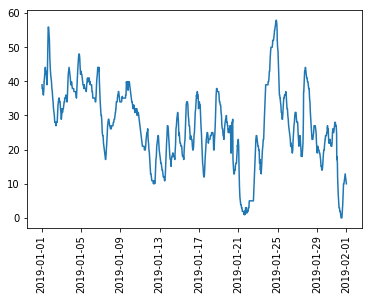

In [40]:
#Get the data from the time column and convert it to a datetime object
pd.to_datetime(df.valid)
df['valid'] = pd.to_datetime(df.valid)

#Now let's plot the first month of temperature data
#First we need to group by the date time object then plot the temperature
dfg = df.groupby(df.valid.dt.month)
#Next we select the month we want, in this case January (1)
jan = dfg.get_group(1)
#Put the temperature data to numbers, first we need to filter out all the missing data, missing data is labelled
#with an M
jan = jan[jan['tmpf'] != 'M']
#Now we convert the temperatures from objects to integers
jan['tmpf'] = pd.to_numeric(jan.tmpf)
#Now we plot it
import matplotlib.pyplot as plt
plt.plot(jan['valid'],jan['tmpf'])
plt.xticks(rotation=90)
plt.show()

This same method will work with any csv or excel files you may have. The only difference for an excel file is instead of read_csv you will use read_excel!

Now let's say we want to group the data in more sophisticated ways. Let's say we want to get the temperatures over the first day of each month. We will need to group the months and days together to start, then we grab the the first of each. We take the temperature data for those days, filter out the missing values and plot it!

Let's dive in!

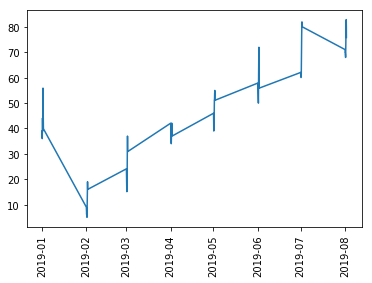

In [83]:
#first group the data by the month and day
newgroup = df.groupby([df.valid.dt.month,df.valid.dt.day])
newgroup.groups
#So now each set of data has two indices attached to it, the first one represents the month and the second
#represents the day. Let's get the data for the first day of all months!
firstday = newgroup.get_group((1,1))
firstday = pd.concat([newgroup.get_group((1,1)),newgroup.get_group((2,1)),newgroup.get_group((3,1)),newgroup.get_group((4,1)),newgroup.get_group((5,1)),newgroup.get_group((6,1)),newgroup.get_group((7,1)),newgroup.get_group((8,1))])

#Now remove the missing temperature data
firstday = firstday[firstday['tmpf'] != 'M']

#Convert it to an integer
firstday['tmpf'] = pd.to_numeric(firstday['tmpf'])

#Now plot the data
import matplotlib.pyplot as plt
plt.plot(firstday.valid,firstday.tmpf)
plt.xticks(rotation=90)
plt.show()

/home/mariofire/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


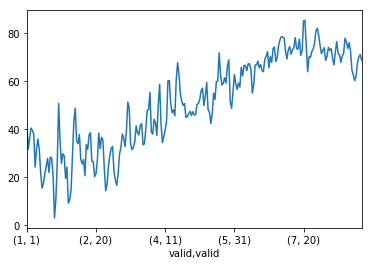

In [93]:
#That looks weird, let's take the mean of each day instead!
#first group the data by the month and day
dff = df
dff = dff[dff.tmpf != 'M']
dff['tmpf'] = pd.to_numeric(dff.tmpf)
newgrouptemp = dff.groupby([df.valid.dt.month,df.valid.dt.day])['tmpf'].mean()
newgrouptemp.plot()

Now let's say we wanted to save the above data to a csv/excel file, pandas has built in functions to help with this!

In [95]:
newgrouptemp.to_csv('newtemp.csv')
newgrouptemp.to_excel('newtemp.xlsx')

/home/mariofire/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
